# Alternating Transfers

1) Set up a "branched" network, where ae and classifier share bottom layers. 

Some useful code: https://github.com/deep-diver/CIFAR10-VGG19-Tensorflow/blob/master/CIFAR10-transfer-learning-tensornets.ipynb

tensorboard tutorial: https://github.com/martinwicke/tf-dev-summit-tensorboard-tutorial 

In [3]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
#import keras


## Define Architectures

### NN 1 (MNIST AE)

In [5]:
inputs_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='targets')

### Encoder
conv1 = tf.layers.conv2d(inputs_, 16, (3,3), padding='same', activation=tf.nn.relu)
# Now 28x28x16
maxpool1 = tf.layers.max_pooling2d(conv1, (2,2), (2,2), padding='same')
# Now 14x14x16
conv2 = tf.layers.conv2d(maxpool1, 8, (3,3), padding='same', activation=tf.nn.relu)
# Now 14x14x8
#maxpool2 = tf.layers.max_pooling2d(conv2, (2,2), (2,2), padding='same')
encoded = tf.layers.max_pooling2d(conv2, (2,2), (2,2), padding='same', name='encoded')
# Now 7x7x8
#conv3 = tf.layers.conv2d(maxpool2, 8, (3,3), padding='same', activation=tf.nn.relu)
# Now 7x7x8
#encoded = tf.layers.max_pooling2d(conv3, (2,2), (2,2), padding='same')
# Now 4x4x8


#Need some kinda of compression step here...



### Decoder
#upsample1 = tf.image.resize_nearest_neighbor(encoded, (7,7))
# Now 7x7x8
#conv4 = tf.layers.conv2d(upsample1, 8, (3,3), padding='same', activation=tf.nn.relu)
# Now 7x7x8
#upsample2 = tf.image.resize_nearest_neighbor(conv4, (14,14))
upsample2 = tf.image.resize_nearest_neighbor(encoded, (14,14))
# Now 14x14x8
conv5 = tf.layers.conv2d(upsample2, 8, (3,3), padding='same', activation=tf.nn.relu)
# Now 14x14x8
upsample3 = tf.image.resize_nearest_neighbor(conv5, (28,28))
# Now 28x28x8
conv6 = tf.layers.conv2d(upsample3, 16, (3,3), padding='same', activation=tf.nn.relu)
# Now 28x28x16

logits = tf.layers.conv2d(conv6, 1, (3,3), padding='same', activation=None)
#Now 28x28x1

decoded = tf.nn.sigmoid(logits, name='decoded')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits, name='loss')
cost = tf.reduce_mean(loss, name='cost')
opt = tf.train.AdamOptimizer(0.001).minimize(cost, name='opt')

In [8]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [22]:
epochs = 2
batch_size = 200

for e in range(epochs):
    print(mnist.train.num_examples//batch_size, "batches")
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        imgs = batch[0].reshape((-1, 28, 28, 1))
        batch_cost, _ = sess.run([cost, opt], feed_dict={inputs_: imgs,
                                                         targets_: imgs})

        if ii%50==0: print("Epoch: {}/{}, batch {}...".format(e+1, epochs, ii), 
                           "Training loss: {:.4f}".format(batch_cost))

300 batches
Epoch: 1/2, batch 0... Training loss: 0.0936
Epoch: 1/2, batch 50... Training loss: 0.0896
Epoch: 1/2, batch 100... Training loss: 0.0914
Epoch: 1/2, batch 150... Training loss: 0.0877
Epoch: 1/2, batch 200... Training loss: 0.0870
Epoch: 1/2, batch 250... Training loss: 0.0832
300 batches
Epoch: 2/2, batch 0... Training loss: 0.0849
Epoch: 2/2, batch 50... Training loss: 0.0832
Epoch: 2/2, batch 100... Training loss: 0.0821
Epoch: 2/2, batch 150... Training loss: 0.0840
Epoch: 2/2, batch 200... Training loss: 0.0805
Epoch: 2/2, batch 250... Training loss: 0.0832


Round 1?

300 batches
Epoch: 1/1, batch 0... Training loss: 0.6829
Epoch: 1/1, batch 50... Training loss: 0.1782
Epoch: 1/1, batch 100... Training loss: 0.1204
Epoch: 1/1, batch 150... Training loss: 0.1025
Epoch: 1/1, batch 200... Training loss: 0.0936
Epoch: 1/1, batch 250... Training loss: 0.0897

Round 2:

300 batches
Epoch: 1/1, batch 0... Training loss: 0.7201
Epoch: 1/1, batch 50... Training loss: 0.1020
Epoch: 1/1, batch 100... Training loss: 0.0953
Epoch: 1/1, batch 150... Training loss: 0.0927
Epoch: 1/1, batch 200... Training loss: 0.0912
Epoch: 1/1, batch 250... Training loss: 0.0942

Round 3:

300 batches
Epoch: 1/1, batch 0... Training loss: 0.1719
Epoch: 1/1, batch 50... Training loss: 0.0925
Epoch: 1/1, batch 100... Training loss: 0.0946
Epoch: 1/1, batch 150... Training loss: 0.0922
Epoch: 1/1, batch 200... Training loss: 0.0907
Epoch: 1/1, batch 250... Training loss: 0.0880

Round 4:

300 batches
Epoch: 1/1, batch 0... Training loss: 0.1090
Epoch: 1/1, batch 50... Training loss: 0.0894
Epoch: 1/1, batch 100... Training loss: 0.0893
Epoch: 1/1, batch 150... Training loss: 0.0869
Epoch: 1/1, batch 200... Training loss: 0.0858
Epoch: 1/1, batch 250... Training loss: 0.0840

Round 5:

300 batches
Epoch: 1/1, batch 0... Training loss: 0.0990
Epoch: 1/1, batch 50... Training loss: 0.0851
Epoch: 1/1, batch 100... Training loss: 0.0867
Epoch: 1/1, batch 150... Training loss: 0.0824
Epoch: 1/1, batch 200... Training loss: 0.0832
Epoch: 1/1, batch 250... Training loss: 0.0847

## Results

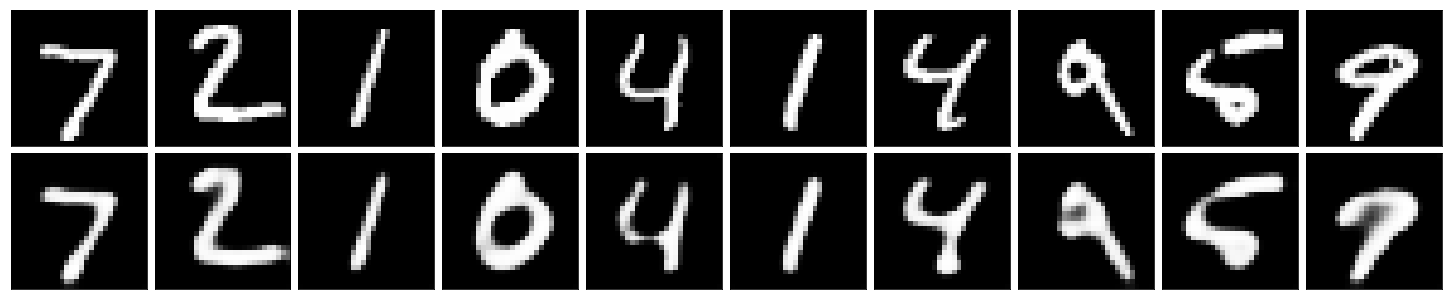

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed = sess.run(decoded, feed_dict={inputs_: in_imgs.reshape((10, 28, 28, 1))})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)


fig.tight_layout(pad=0.1)

## Now, try to fit a classifier on top of encoded layer

In [ ]:
class_targets_lab_ = tf.placeholder(tf.int32, (None), name='class_targets_lab_')

class_flat1 = tf.layers.flatten(encoded)
#dense1 = tf.layers.dense(flat1, 128, activation=tf.nn.relu)
# Now 1*128
class_drop1 = tf.layers.dropout(class_flat1, rate = 0.5)
class_dense2 = tf.layers.dense(class_drop1, 64, activation=tf.nn.relu)
# Now 1*64
class_drop2 = tf.layers.dropout(class_dense2, rate = 0.5)
class_final = tf.layers.dense(class_drop2, 10, activation=tf.nn.softmax)
# 1*10

class_one_hot_labs = tf.one_hot(class_targets_lab_,10)

#loss1 = tf.nn.sigmoid_cross_entropy_with_logits(labels=one_hot_labs, logits=final)
class_loss1 = tf.nn.softmax_cross_entropy_with_logits(labels=class_one_hot_labs, logits=class_final)
class_cost1 = tf.reduce_mean(class_loss1)
class_opt1 = tf.train.AdamOptimizer(0.001).minimize(class_cost1)

## Initialize only the uninitialized variables (don't overwrite trained variables)

https://stackoverflow.com/questions/35164529/in-tensorflow-is-there-any-way-to-just-initialize-uninitialised-variables/35618160

In [ ]:
#tf.get_variable([sess.run(tf.report_uninitialized_variables(tf.all_variables()))[0]])

#uninitialized_variables = list(tf.get_variable(name) for name in
tf.initialize_variables([sess.run(tf.report_uninitialized_variables(tf.all_variables()))[0]])

## Attempt #2

### Also failed... BUT, I can just initialize everything up front! Genius!

In [ ]:
uninitialized_vars

In [ ]:
#uninitialized_vars = []
#for var in tf.all_variables():
#    try:
#        sess.run(var)
#    except tf.errors.FailedPreconditionError:
#        uninitialized_vars.append(var)

In [ ]:
#tf.initialize_variables(uninitialized_vars)

In [ ]:
#sess.run(tf.global_variables_initializer())

In [2]:

mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [ ]:
#Train the thing
epochs = 1
batch_size = 200
#Maybe I don't initialize since the params are already pre-trained??
#sess.run(tf.global_variables_initializer())
#sess.run(class_targets_lab_.initializer)
#sess.run(tf.variables_initializer([class_flat1]))
#sess.run(class_flat1.initializer)
#sess.run(class_drop1.initializer)
#sess.run(class_dense2.initializer)
#sess.run(class_drop2.initializer)
#sess.run(class_final.initializer)
#sess.run(class_one_hot_labs.initializer)
#sess.run(class_loss1.initializer)
#sess.run(class_cost1.initializer)
#sess.run(class_opt1.initializer)


for e in range(epochs):
    print(mnist.train.num_examples//batch_size, "batches")
    for ii in range(mnist.train.num_examples//batch_size):
        imgs = mnist.train.images[ii*batch_size : (ii+1)*batch_size].reshape((-1, 28, 28, 1))
        labs = mnist.train.labels[ii*batch_size : (ii+1)*batch_size]
        #print(labs.shape)
        #imgs = batch[0].reshape((-1, 28, 28, 1))
        batch_cost, _ = sess.run([class_cost1, class_opt1], feed_dict={inputs_: imgs,
                                                           class_targets_lab_: labs})

        if ii%50==0: print("Epoch: {}/{}, batch {}...".format(e+1, epochs, ii), 
                           "Training loss: {:.4f}".format(batch_cost))

Round 1

300 batches
Epoch: 1/1, batch 0... Training loss: 2.3055
Epoch: 1/1, batch 50... Training loss: 1.8235
Epoch: 1/1, batch 100... Training loss: 1.6725
Epoch: 1/1, batch 150... Training loss: 1.6407
Epoch: 1/1, batch 200... Training loss: 1.6555
Epoch: 1/1, batch 250... Training loss: 1.6257

Round 2

300 batches
Epoch: 1/1, batch 0... Training loss: 1.6475
Epoch: 1/1, batch 50... Training loss: 1.6305
Epoch: 1/1, batch 100... Training loss: 1.6143
Epoch: 1/1, batch 150... Training loss: 1.5814
Epoch: 1/1, batch 200... Training loss: 1.6306
Epoch: 1/1, batch 250... Training loss: 1.6183

Round 3:

300 batches
Epoch: 1/1, batch 0... Training loss: 1.6529
Epoch: 1/1, batch 50... Training loss: 1.6107
Epoch: 1/1, batch 100... Training loss: 1.6054
Epoch: 1/1, batch 150... Training loss: 1.6203
Epoch: 1/1, batch 200... Training loss: 1.5574
Epoch: 1/1, batch 250... Training loss: 1.5753

Round 4:

300 batches
Epoch: 1/1, batch 0... Training loss: 1.6008
Epoch: 1/1, batch 50... Training loss: 1.6237
Epoch: 1/1, batch 100... Training loss: 1.6226
Epoch: 1/1, batch 150... Training loss: 1.5701
Epoch: 1/1, batch 200... Training loss: 1.5743
Epoch: 1/1, batch 250... Training loss: 1.5555

Round 5:

300 batches
Epoch: 1/1, batch 0... Training loss: 1.6018
Epoch: 1/1, batch 50... Training loss: 1.5357
Epoch: 1/1, batch 100... Training loss: 1.6070
Epoch: 1/1, batch 150... Training loss: 1.5750
Epoch: 1/1, batch 200... Training loss: 1.5945
Epoch: 1/1, batch 250... Training loss: 1.5624

In [ ]:
# Test accuracy
test_preds = sess.run(class_final, feed_dict = {inputs_: mnist.test.images.reshape(-1,28,28,1)})
test_preds_cat = [x.argmax() for x in test_preds]
sum(test_preds_cat == mnist.test.labels)/len(test_preds_cat)

## Looking promising! After alternating, I should still "freeze" the encoder and fine tune decoder and classifier portions for accuracy boost

## Save the models for later use

https://cv-tricks.com/tensorflow-tutorial/save-restore-tensorflow-models-quick-complete-tutorial/

In [17]:
# Add ops to save and restore all the variables.
saver = tf.train.Saver()
save_path = saver.save(sess, "./ml-compression/models/model1")
print("Model saved in path: %s" % save_path)

Model saved in path: ./ml-compression/models/model1


In [18]:
class_final

NameError: name 'class_final' is not defined

In [24]:
saver.restore(sess, tf.train.latest_checkpoint('./ml-compression/models/'))

INFO:tensorflow:Restoring parameters from ./ml-compression/models/model1
